<a href="https://colab.research.google.com/github/ShimaGhandriz/Alzheimer-Classification/blob/main/Alzheimer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import The Libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from glob import glob

In [2]:
# to upload file from PC, in this case a kaggle.json file.

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shimaqandriz","key":"feb3d1094353aa481862ec2e4a642e7b"}'}

In [3]:
# I guess it navigates to a specific directory

import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [4]:
# downloads a kaggle dataset to content directory

!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 88% 30.0M/34.1M [00:01<00:00, 36.9MB/s]
100% 34.1M/34.1M [00:01<00:00, 25.1MB/s]


In [5]:
# Unzip the files

from zipfile import ZipFile

with ZipFile('/content/alzheimers-dataset-4-class-of-images.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory // mode read r/ w a
   zipObj.extractall()

In [ ]:
# Open an image

img = Image.open("/content/Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg")
img.show()

In [ ]:
# delete one class in test dataset file

!rm '/content/Alzheimer_s Dataset/test/ModerateDemented'/*.jpg
!rmdir '/content/Alzheimer_s Dataset/test/ModerateDemented'

In [ ]:
# Converts a tf.data.Dataset to an iterable of NumPy arrays

import tensorflow_datasets as tfds

tfds.as_numpy(train_ds)


In [6]:
##################### Start Here #####################

# Creating new directories to augment each class seperately

!mkdir Alzheimer_dataset_new

!mkdir Alzheimer_dataset_new/train1
!mkdir Alzheimer_dataset_new/train1/Mild
!cp '/content/Alzheimer_s Dataset/train/MildDemented'/*.jpg '/content/Alzheimer_dataset_new/train1/Mild'

!mkdir Alzheimer_dataset_new/train2
!mkdir Alzheimer_dataset_new/train2/Moderate
!cp '/content/Alzheimer_s Dataset/train/ModerateDemented'/*.jpg '/content/Alzheimer_dataset_new/train2/Moderate'

!mkdir Alzheimer_dataset_new/train3
!mkdir Alzheimer_dataset_new/train3/None
!cp '/content/Alzheimer_s Dataset/train/NonDemented'/*.jpg '/content/Alzheimer_dataset_new/train3/None'

!mkdir Alzheimer_dataset_new/train4
!mkdir Alzheimer_dataset_new/train4/VeryMild
!cp '/content/Alzheimer_s Dataset/train/VeryMildDemented'/*.jpg '/content/Alzheimer_dataset_new/train4/VeryMild'

!mkdir Augmented


In [7]:
# Image Augmentation Details

train_datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.1,   #% shift
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip= True,
        fill_mode='nearest')    #Also try constant, reflect, wrap


In [8]:
# Augmentation MildDemented class (and saving them to the original dataset directory)

# It creates 3*717 augmented images and adds them to the original data

i = 1
for batch in train_datagen.flow_from_directory(directory=r"/content/Alzheimer_dataset_new/train1",
                                               target_size=(224, 224),
                                               color_mode="rgb",
                                               batch_size=717,
                                               class_mode="categorical",
                                               save_to_dir='Alzheimer_s Dataset/train/MildDemented',
                                               save_prefix='aug',
                                               save_format='jpg',
                                               shuffle=True,
                                               #seed=42
                                               ):
    i += 1
    if i > 3:
      break

lst = os.listdir('Alzheimer_s Dataset/train/MildDemented') # your directory path
number_files = len(lst)
print(number_files, '(Original + Augmented)')

Found 717 images belonging to 1 classes.
2868 (Original + Augmented)


In [9]:
# Augmentation of ModerateDemented Class

# It creates 49*52 augmented images and adds them to the original data


i = 1
for batch in train_datagen.flow_from_directory(directory=r"/content/Alzheimer_dataset_new/train2",
                                               target_size=(224, 224),
                                               color_mode="rgb",
                                               batch_size=52,
                                               class_mode="categorical",
                                               save_to_dir='Alzheimer_s Dataset/train/ModerateDemented',
                                               save_prefix='aug',
                                               save_format='jpg',
                                               shuffle=True,
                                               #seed=42
                                               ):
    i += 1
    if i > 49:
      break

lst = os.listdir('Alzheimer_s Dataset/train/ModerateDemented') # your directory path
number_files = len(lst)
print(number_files, '(Original + Augmented)')

Found 52 images belonging to 1 classes.
2600 (Original + Augmented)


In [10]:
# Augmentation NonDemented Class

# It creates 1*32 augmented images and adds them to the original data


i = 1
for batch in train_datagen.flow_from_directory(directory=r"/content/Alzheimer_dataset_new/train3",
                                               target_size=(224, 224),
                                               color_mode="rgb",
                                               batch_size=32,
                                               class_mode="categorical",
                                               save_to_dir='Alzheimer_s Dataset/train/NonDemented',
                                               save_prefix='aug',
                                               save_format='jpg',
                                               shuffle=True,
                                               #seed=42
                                               ):
    i += 1
    if i > 1:
      break

lst = os.listdir('Alzheimer_s Dataset/train/NonDemented') # your directory path
number_files = len(lst)
print(number_files, '(Original + Augmented)')

Found 2560 images belonging to 1 classes.
2592 (Original + Augmented)


In [11]:
# Augmentation VeryMildDemented Class

# It creates 24*32 augmented images and adds them to the original data


i = 1
for batch in train_datagen.flow_from_directory(directory=r"/content/Alzheimer_dataset_new/train4",
                                               target_size=(224, 224),
                                               color_mode="rgb",
                                               batch_size=32,
                                               class_mode="categorical",
                                               save_to_dir='Alzheimer_s Dataset/train/VeryMildDemented',
                                               save_prefix='aug',
                                               save_format='jpg',
                                               shuffle=True,
                                               #seed=42
                                               ):
    i += 1
    if i > 24:
      break

lst = os.listdir('Alzheimer_s Dataset/train/VeryMildDemented') # your directory path
number_files = len(lst)
print(number_files, '(Original + Augmented)')

Found 1792 images belonging to 1 classes.
2560 (Original + Augmented)


In [18]:
# Loading the Augmented Train Dataset


train_dr = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,fill_mode='constant',cval=0,
                                                           brightness_range=[.8,1.2],
                                                           zoom_range=[.99,1.01],
                                                           data_format='channels_last',
                                                           zca_whitening=False)


train_ds_gen = train_dr.flow_from_directory(directory="/content/Alzheimer_s Dataset/train",
                                              target_size=(176,208),
                                              batch_size=11000)

Found 10620 images belonging to 4 classes.


In [19]:
# Loading the Test Dataset

test_dr = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                          fill_mode='constant',cval=0,
                                                          zoom_range=[1,1],
                                                          data_format='channels_last')

test_ds_gen = test_dr.flow_from_directory(directory="/content/Alzheimer_s Dataset/test",
                                            target_size=(176,208),
                                            batch_size=5000,
                                            shuffle = False)

#test_ds =  tf.keras.preprocessing.image_dataset_from_directory(
#     directory = '/content/Alzheimer_s Dataset/test',
#     labels = "inferred",
#     batch_size = 32 ,
#     image_size = (224, 224),
#     label_mode = 'categorical'
#)


Found 1279 images belonging to 4 classes.


In [20]:


# This section assigns the images to numpy arrays for the data and labels
# EX: train_data = numpy array of image data, train_labels = numpy array of labels

train_data,train_labels =  train_ds_gen.next()
test_data,test_labels = test_ds_gen.next()

#val_data,val_labels = val_data_gen.next()



In [ ]:
# cocatenate arrays, combining all data
total_data = np.concatenate((train_data,test_data))
total_labels = np.concatenate((train_labels,test_labels))
print(total_data.shape)
print(total_labels.shape)

In [ ]:
# train test split

initial_split = 0.1 + 0.2
test_val_split = 0.1 /initial_split

# split into training and (test + validation)
train_data, test_val_data, train_labels, test_val_labels = train_test_split(total_data,total_labels,
                                                                            test_size=initial_split)

# split (test + validation) into test and validation sets
test_data, val_data, test_labels, val_labels = train_test_split(test_val_data,test_val_labels,
                                                                test_size=test_val_split)

print('train: ',train_data.shape)
print('validation',val_data.shape)
print('test',test_data.shape)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


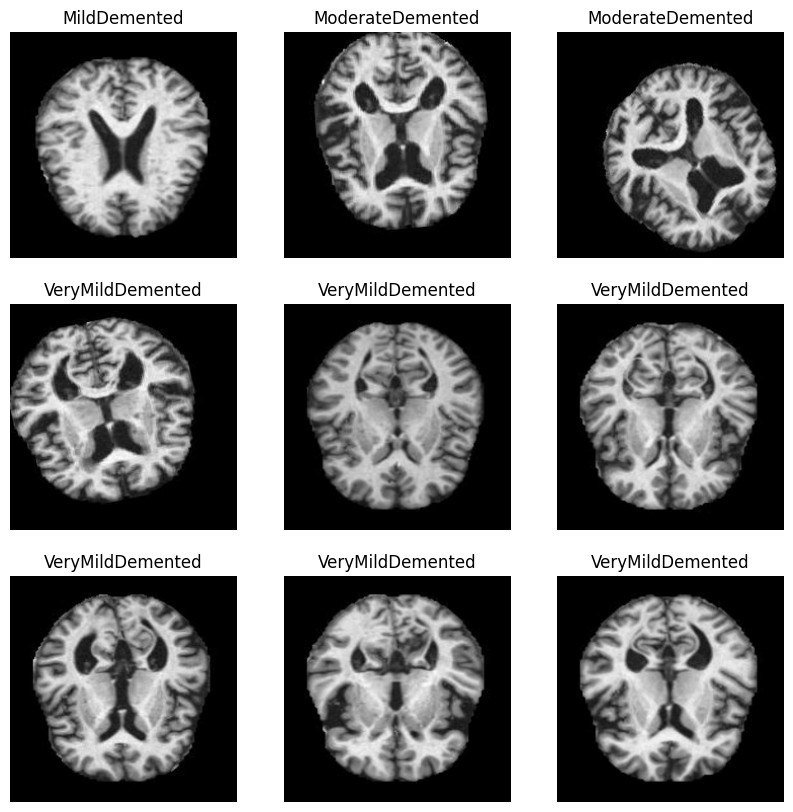

In [14]:
# Data Visualization

class_names = train_ds_gen.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds_gen.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.where(labels[i].numpy()==1)[0].tolist()[0]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds_gen:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

for image_batch, labels_batch in test_ds_gen:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

#imag , labe = aug_train_ds.next(1)
print (images.shape, labels.shape)

(32, 224, 224, 3) (32, 4)


In [14]:
!kaggle datasets download -d sadikaljarif/vgg16-weights

 94% 49.0M/52.2M [00:01<00:00, 34.3MB/s]
100% 52.2M/52.2M [00:01<00:00, 34.5MB/s]


In [15]:
# Unzip the files

from zipfile import ZipFile

with ZipFile('/content/vgg16-weights.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory // mode read r/ w a
   zipObj.extractall()

In [16]:
# import pre-trained VGG16 model

weight_path1 ='/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop-2.h5'
vg_model = tf.keras.applications.vgg16.VGG16(weights = weight_path1,
                                             include_top=False,
                                             input_shape=(224,224,3),
                                             pooling = 'max') #added pooling


In [17]:
## CHANGE MODEL STRUCTURE ##

layers_unlocked = True

# retrain some of the convolutional layers deep in the model, but not the fully connected layers at the end
vg_model.get_layer('block1_conv1').trainable = layers_unlocked
vg_model.get_layer('block1_conv2').trainable = layers_unlocked
vg_model.get_layer('block2_conv1').trainable = layers_unlocked
vg_model.get_layer('block2_conv2').trainable = layers_unlocked
vg_model.get_layer('block3_conv1').trainable = layers_unlocked
vg_model.get_layer('block3_conv2').trainable = layers_unlocked
vg_model.get_layer('block3_conv3').trainable = layers_unlocked
vg_model.get_layer('block4_conv1').trainable = layers_unlocked
vg_model.get_layer('block4_conv2').trainable = layers_unlocked
vg_model.get_layer('block4_conv3').trainable = layers_unlocked

# always leave last layer trainable ##
vg_model.get_layer('block5_conv1').trainable = False
vg_model.get_layer('block5_conv2').trainable = False
vg_model.get_layer('block5_conv3').trainable = False

## Add new trainable FC layers ##
flat = Flatten()(vg_model.output)
fc1 = Dense(1024,activation='relu', kernel_initializer='he_uniform')(flat) # put in kernel initializer he-uniform
dp1 = Dropout(0.25)(fc1)                                                   # changed dropout here from .5
output = Dense(4,activation='softmax')(dp1)                                # changed to sigmoid from softmax
vg_model = Model(inputs=vg_model.inputs, outputs=output)

vg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
# compile the model
#changed from tf.keras.optimizers.Adam(learning_rate=.0001) to SGD+nest.+momentum
lr = 0.001
momentum = .9

opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum, nesterov=True,name='SGD')
vg_model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [23]:
model_history = vg_model.fit(train_ds_gen,
                             validation_data=test_ds_gen,
                             epochs=20,
                             ) #changed batch size from 15

Epoch 1/20
332/332 [==============================] - 137s 407ms/step - loss: 1.1070 - accuracy: 0.4608 - val_loss: 0.9677 - val_accuracy: 0.5520
Epoch 2/20
332/332 [==============================] - 135s 407ms/step - loss: 0.7821 - accuracy: 0.6447 - val_loss: 0.9364 - val_accuracy: 0.5645
Epoch 3/20
332/332 [==============================] - 135s 406ms/step - loss: 0.5734 - accuracy: 0.7422 - val_loss: 0.9501 - val_accuracy: 0.5176
Epoch 4/20
332/332 [==============================] - 135s 407ms/step - loss: 0.4782 - accuracy: 0.7919 - val_loss: 0.8742 - val_accuracy: 0.5856
Epoch 5/20
332/332 [==============================] - 135s 407ms/step - loss: 0.3657 - accuracy: 0.8465 - val_loss: 0.9030 - val_accuracy: 0.6552
Epoch 6/20
332/332 [==============================] - 135s 407ms/step - loss: 0.2515 - accuracy: 0.9008 - val_loss: 0.9953 - val_accuracy: 0.6396
Epoch 7/20
332/332 [==============================] - 136s 408ms/step - loss: 0.1770 - accuracy: 0.9323 - val_loss: 0.8842 -

KeyboardInterrupt: 

In [ ]:
# TRANSFER LEARNING

resnet = ResNet50(
    weights = 'imagenet', # Default weights.
    include_top = False,   # ,
     pooling='max'
)
print(len(resnet.layers))
for layer in resnet.layers[:174]:
    layer.trainable = False

#base_model = Sequential([aug_train_ds]) # Applying augmentation to the model ???

base_model = Sequential()
base_model.add(resnet)
base_model.add(Dense(512, activation='relu'))
#base_model.add(Dropout(0.1))
base_model.add(Dense(128, activation='relu'))
base_model.add(Dense(64, activation='relu'))

base_model.add(Dense(4, activation='softmax'))

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]

base_model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = METRICS)

base_model.build((None,224,224,3)) # `input_shape` is the shape of the input data
base_model.summary()

176
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 4)                 260       
                                                                 
Total params: 24710980 (94.26 MB)
Trainable params: 1123268 (4.28 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
resnet_history = base_model.fit(aug_train_ds,
                                validation_data = test_ds ,
                                #steps_per_epoch = len(train_ds),
                                epochs = 20)

Epoch 1/20
332/332 [==============================] - 49s 129ms/step - loss: 1.1175 - acc: 0.6067 - auc: 0.8439 - val_loss: 0.9985 - val_acc: 0.5418 - val_auc: 0.8279
Epoch 2/20
332/332 [==============================] - 36s 109ms/step - loss: 0.6495 - acc: 0.7187 - auc: 0.9247 - val_loss: 1.2187 - val_acc: 0.4613 - val_auc: 0.7384
Epoch 3/20
332/332 [==============================] - 37s 110ms/step - loss: 0.5690 - acc: 0.7490 - auc: 0.9409 - val_loss: 0.9289 - val_acc: 0.5747 - val_auc: 0.8399
Epoch 4/20
332/332 [==============================] - 37s 110ms/step - loss: 0.5224 - acc: 0.7697 - auc: 0.9498 - val_loss: 0.9030 - val_acc: 0.5966 - val_auc: 0.8510
Epoch 5/20
332/332 [==============================] - 37s 110ms/step - loss: 0.4839 - acc: 0.7911 - auc: 0.9568 - val_loss: 1.0703 - val_acc: 0.5207 - val_auc: 0.7940
Epoch 6/20
332/332 [==============================] - 37s 110ms/step - loss: 0.4496 - acc: 0.8124 - auc: 0.9627 - val_loss: 0.8867 - val_acc: 0.6231 - val_auc: 0.866

In [ ]:
# Another Model From another kaggle notebook

def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )

    return block

In [ ]:

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

In [ ]:
IMAGE_SIZE = [224, 224]

def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),
        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(4, activation='softmax')
    ])

    return model

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

print(tf.__version__)

Number of replicas: 1
2.15.0


In [ ]:

with strategy.scope():
    model = build_model()

    METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]

    model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=METRICS
    )


In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5",
                                                    save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 sequential (Sequential)     (None, 56, 56, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 14, 14, 128)       27072     
                                                      

In [ ]:

history = model.fit(
    aug_train_ds,
    validation_data=test_ds,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],
    epochs=30
)

Epoch 1/30
332/332 [==============================] - ETA: 0s - loss: 1.1769 - acc: 0.4379 - auc: 0.7430

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


332/332 [==============================] - 55s 118ms/step - loss: 1.1769 - acc: 0.4379 - auc: 0.7430 - val_loss: 2.0109 - val_acc: 0.5145 - val_auc: 0.7920 - lr: 0.0100
Epoch 2/30
332/332 [==============================] - 37s 110ms/step - loss: 1.0434 - acc: 0.4812 - auc: 0.7870 - val_loss: 4.0026 - val_acc: 0.3378 - val_auc: 0.7124 - lr: 0.0089
Epoch 3/30
332/332 [==============================] - 37s 111ms/step - loss: 0.9950 - acc: 0.5052 - auc: 0.8050 - val_loss: 2.4232 - val_acc: 0.0594 - val_auc: 0.3635 - lr: 0.0079
Epoch 4/30
332/332 [==============================] - 37s 111ms/step - loss: 0.9597 - acc: 0.5378 - auc: 0.8234 - val_loss: 1.6019 - val_acc: 0.3526 - val_auc: 0.6508 - lr: 0.0071
Epoch 5/30
332/332 [==============================] - 36s 109ms/step - loss: 0.9061 - acc: 0.5750 - auc: 0.8459 - val_loss: 5.6748 - val_acc: 0.5066 - val_auc: 0.7479 - lr: 0.0063
Epoch 6/30
332/332 [==============================] - 37s 111ms/step - loss: 0.8700 - acc: 0.6011 - auc: 0.8598